In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv('./data_rest.tsv',delimiter='\t',quoting=3)

In [1]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# to convert verb to noun as it has same meaning for eg I loved this rest is same as i love this rest as love means the same :- 
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-z]',' ',dataset['Review'][i]) #removes any kind of punctutation
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]# stems all the words
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /home/zane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'dataset' is not defined

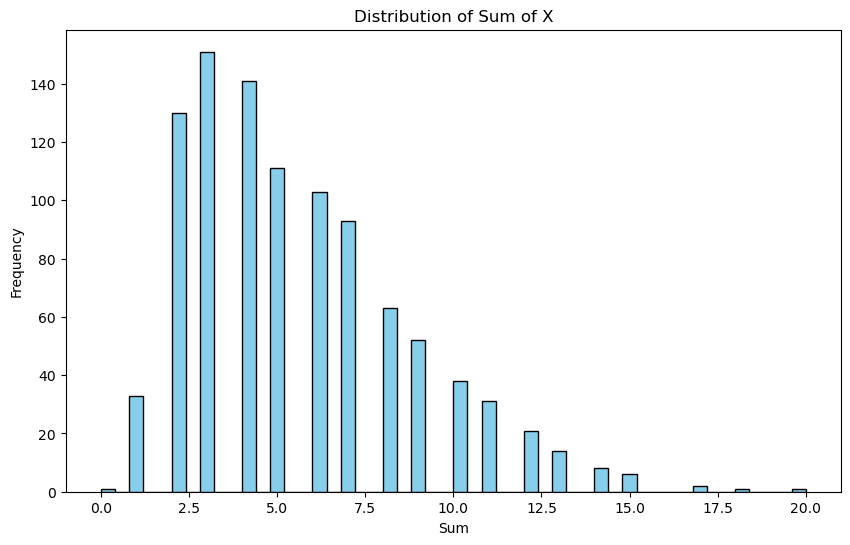

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values
sum_x = np.sum(x, axis=1)

# Create a histogram
plt.figure(figsize=(10,6))
plt.hist(sum_x, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sum of X')
plt.xlabel('Sum')
plt.ylabel('Frequency')
plt.show()

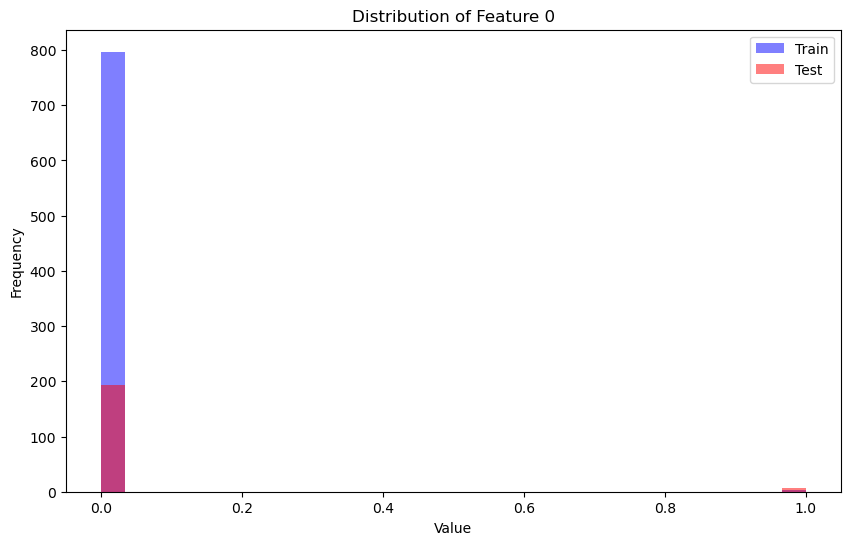

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=1)

feature_idx = 0

plt.figure(figsize=(10,6))

# Plot histogram for the training set
plt.hist(x_train[:, feature_idx], bins=30, alpha=0.5, label='Train', color='blue')

# Plot histogram for the test set
plt.hist(x_test[:, feature_idx], bins=30, alpha=0.5, label='Test', color='red')

plt.title('Distribution of Feature ' + str(feature_idx))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


In [10]:
from sklearn.naive_bayes import GaussianNB
cls=GaussianNB()
cls.fit(x_train,y_train)

GaussianNB()

[[60 48]
 [15 77]]
0.685


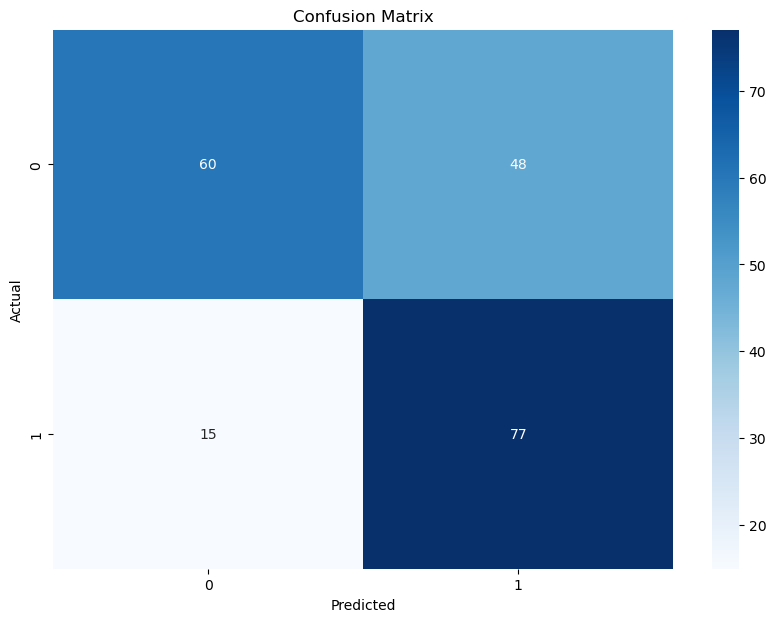

In [16]:
y_pred=cls.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()